In [1]:
from train import train_data_iterator
from util import render_example, split_and_keep_second_part
from train_lora import (
    postprocess_tokens,
    gen_data_iterator,
    prepare_test_dataset,
    PaliGemmaConfig,
    train_lora,
)

import sentencepiece
from IPython.core.display import display, HTML

2024-07-03 11:44:23.162626: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_ds, val_ds = prepare_test_dataset()

loading Roboflow workspace...
loading Roboflow project...


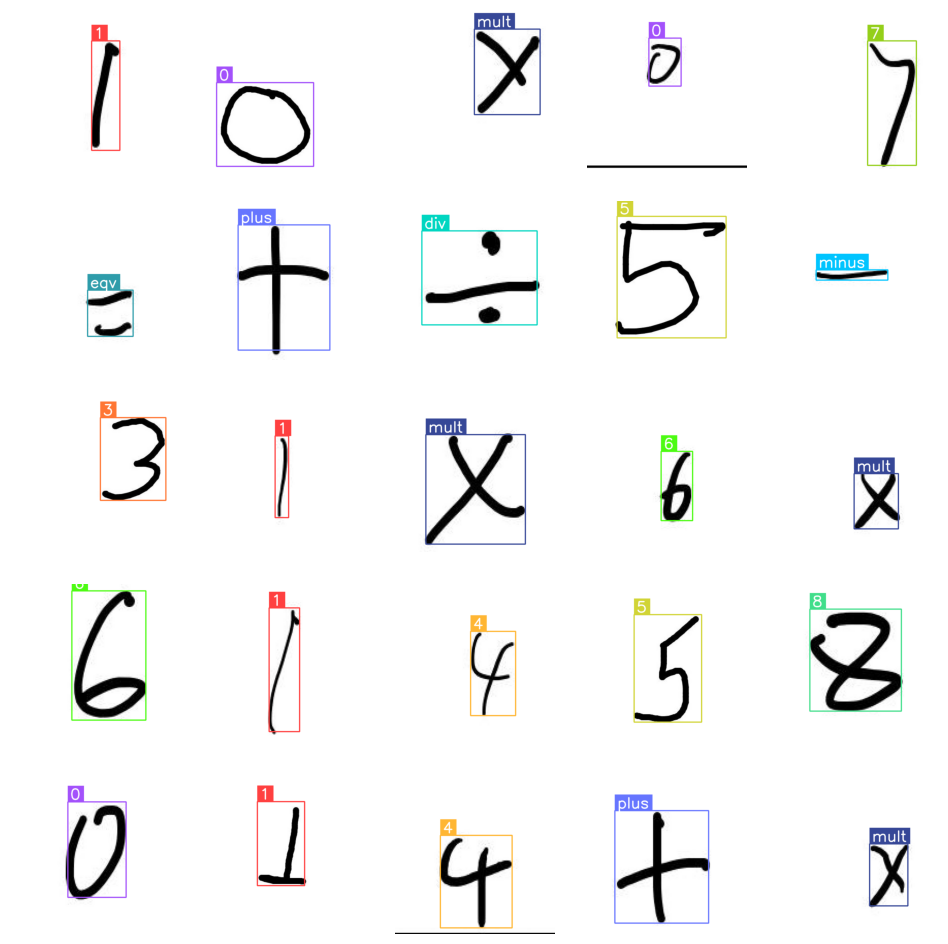

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'div',
 'eqv',
 'minus',
 'mult',
 'plus']

In [3]:
from util import check_test_data

classes = check_test_data("./number-ops-1")
classes

Training examples


2024-07-03 11:44:28.639484: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...



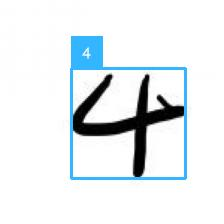
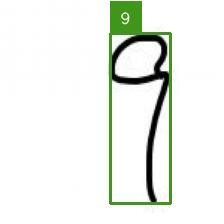
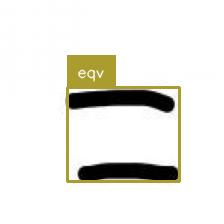
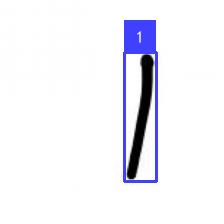

In [4]:
config = PaliGemmaConfig()
tokenizer = sentencepiece.SentencePieceProcessor(config.TOKENIZER_PATH)  # type: ignore

train_data_iterator = gen_data_iterator(train_ds.get_tfdata(), tokenizer)
config = PaliGemmaConfig()


html_out = ""
for idx, example in zip(range(4), train_data_iterator):
    caption = postprocess_tokens(tokenizer, example["text"])  # de-tokenize model input.
    caption = split_and_keep_second_part(caption)
    html_out += render_example(example["image"], caption, classes=classes)

print("Training examples")
display(HTML(html_out))

In [5]:
train_lora(config, "./checkpoints", train_ds, val_ds)

Model path: /home/j2y/.cache/kagglehub/models/google/paligemma/jax/paligemma-3b-pt-224/1/paligemma-3b-pt-224.f16.npz
Successfully loaded and sharded model parameters!


Output()

ScopeParamShapeError: Initializer expected to generate shape (19, 1, 2048, 256) but got shape (2, 1, 2048, 256) instead for parameter "w" in "/llm/remat(scan(layers))/attn/kv_einsum". (https://flax.readthedocs.io/en/latest/api_reference/flax.errors.html#flax.errors.ScopeParamShapeError)